In [1]:
import pandas as pd

In [2]:
courses = pd.read_csv("online_courses_uses.csv")

In [3]:
courses.head()

,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5)
0,1,Course_1,Office Tools,21,4217,50.646827,Coursera,38.797425,4.811252
1,2,Course_2,Office Tools,57,4238,82.240240,edX,160.650991,3.829329
2,3,Course_3,Technology,52,2700,55.729028,LinkedIn Learning,123.503781,4.851950
3,4,Course_4,Office Tools,69,4308,58.664729,LinkedIn Learning,116.775704,3.913732
4,5,Course_5,Technology,43,4792,62.598147,Udemy,96.246696,4.921968


In [4]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Course_ID            10000 non-null  int64  
 1   Course_Name          10000 non-null  object 
 2   Category             10000 non-null  object 
 3   Duration (hours)     10000 non-null  int64  
 4   Enrolled_Students    10000 non-null  int64  
 5   Completion_Rate (%)  10000 non-null  float64
 6   Platform             10000 non-null  object 
 7   Price ($)            10000 non-null  float64
 8   Rating (out of 5)    10000 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 703.3+ KB


In [5]:
courses.describe()

,Course_ID,Duration (hours),Enrolled_Students,Completion_Rate (%),Price ($),Rating (out of 5)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,55.144000,2530.653000,75.119729,106.391332,3.994154
std,2886.89568,26.199242,1423.808243,14.462138,55.100685,0.575502
min,1.00000,10.000000,101.000000,50.008183,10.037145,3.000026
25%,2500.75000,32.000000,1289.000000,62.629516,58.613731,3.490250
50%,5000.50000,55.000000,2532.000000,75.156568,108.042392,4.002789
75%,7500.25000,78.000000,3764.000000,87.595268,153.945558,4.483662
max,10000.00000,100.000000,5000.000000,99.994300,199.962412,4.999176


In [6]:
courses['Platform'].value_counts() #4 cat. vars to be assigned numerical vals

Platform
Udemy                2554
LinkedIn Learning    2501
edX                  2479
Coursera             2466
Name: count, dtype: int64

In [7]:
courses['Category'].value_counts() #9 cat. vars to be assigned numerical vals

Category
Business        1148
Office Tools    1139
Marketing       1126
Finance         1124
Design          1112
AI              1104
Data Science    1098
Programming     1076
Technology      1073
Name: count, dtype: int64

## One Hot Encoding for Categorical Variables

One hot encoding was chosen as the unique categories added a manageable number of features and no ordinal relationship was observed in the categorical variables (neither Category nor Platform).

In [8]:
# Encoding Categories

one_hot = pd.get_dummies(courses['Category'])
one_hot = one_hot.astype(int)
courses = courses.join(one_hot, rsuffix='_coded')
courses.head()

,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5),AI,Business,Data Science,Design,Finance,Marketing,Office Tools,Programming,Technology
0,1,Course_1,Office Tools,21,4217,50.646827,Coursera,38.797425,4.811252,0,0,0,0,0,0,1,0,0
1,2,Course_2,Office Tools,57,4238,82.240240,edX,160.650991,3.829329,0,0,0,0,0,0,1,0,0
2,3,Course_3,Technology,52,2700,55.729028,LinkedIn Learning,123.503781,4.851950,0,0,0,0,0,0,0,0,1
3,4,Course_4,Office Tools,69,4308,58.664729,LinkedIn Learning,116.775704,3.913732,0,0,0,0,0,0,1,0,0
4,5,Course_5,Technology,43,4792,62.598147,Udemy,96.246696,4.921968,0,0,0,0,0,0,0,0,1


In [9]:
# Encoding Platforms

one_hot = pd.get_dummies(courses['Platform'])
one_hot = one_hot.astype(int)
courses = courses.join(one_hot, rsuffix='_coded')
courses.head()

,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5),AI,...,Design,Finance,Marketing,Office Tools,Programming,Technology,Coursera,LinkedIn Learning,Udemy,edX
0,1,Course_1,Office Tools,21,4217,50.646827,Coursera,38.797425,4.811252,0,...,0,0,0,1,0,0,1,0,0,0
1,2,Course_2,Office Tools,57,4238,82.240240,edX,160.650991,3.829329,0,...,0,0,0,1,0,0,0,0,0,1
2,3,Course_3,Technology,52,2700,55.729028,LinkedIn Learning,123.503781,4.851950,0,...,0,0,0,0,0,1,0,1,0,0
3,4,Course_4,Office Tools,69,4308,58.664729,LinkedIn Learning,116.775704,3.913732,0,...,0,0,0,1,0,0,0,1,0,0
4,5,Course_5,Technology,43,4792,62.598147,Udemy,96.246696,4.921968,0,...,0,0,0,0,0,1,0,0,1,0


In [10]:
courses.shape

(10000, 22)

In [11]:
%matplotlib inline

array([[<Axes: title={'center': 'Course_ID'}>,
        <Axes: title={'center': 'Duration (hours)'}>,
        <Axes: title={'center': 'Enrolled_Students'}>,
        <Axes: title={'center': 'Completion_Rate (%)'}>],
       [<Axes: title={'center': 'Price ($)'}>,
        <Axes: title={'center': 'Rating (out of 5)'}>,
        <Axes: title={'center': 'AI'}>,
        <Axes: title={'center': 'Business'}>],
       [<Axes: title={'center': 'Data Science'}>,
        <Axes: title={'center': 'Design'}>,
        <Axes: title={'center': 'Finance'}>,
        <Axes: title={'center': 'Marketing'}>],
       [<Axes: title={'center': 'Office Tools'}>,
        <Axes: title={'center': 'Programming'}>,
        <Axes: title={'center': 'Technology'}>,
        <Axes: title={'center': 'Coursera'}>],
       [<Axes: title={'center': 'LinkedIn Learning'}>,
        <Axes: title={'center': 'Udemy'}>,
        <Axes: title={'center': 'edX'}>, <Axes: >]], dtype=object)

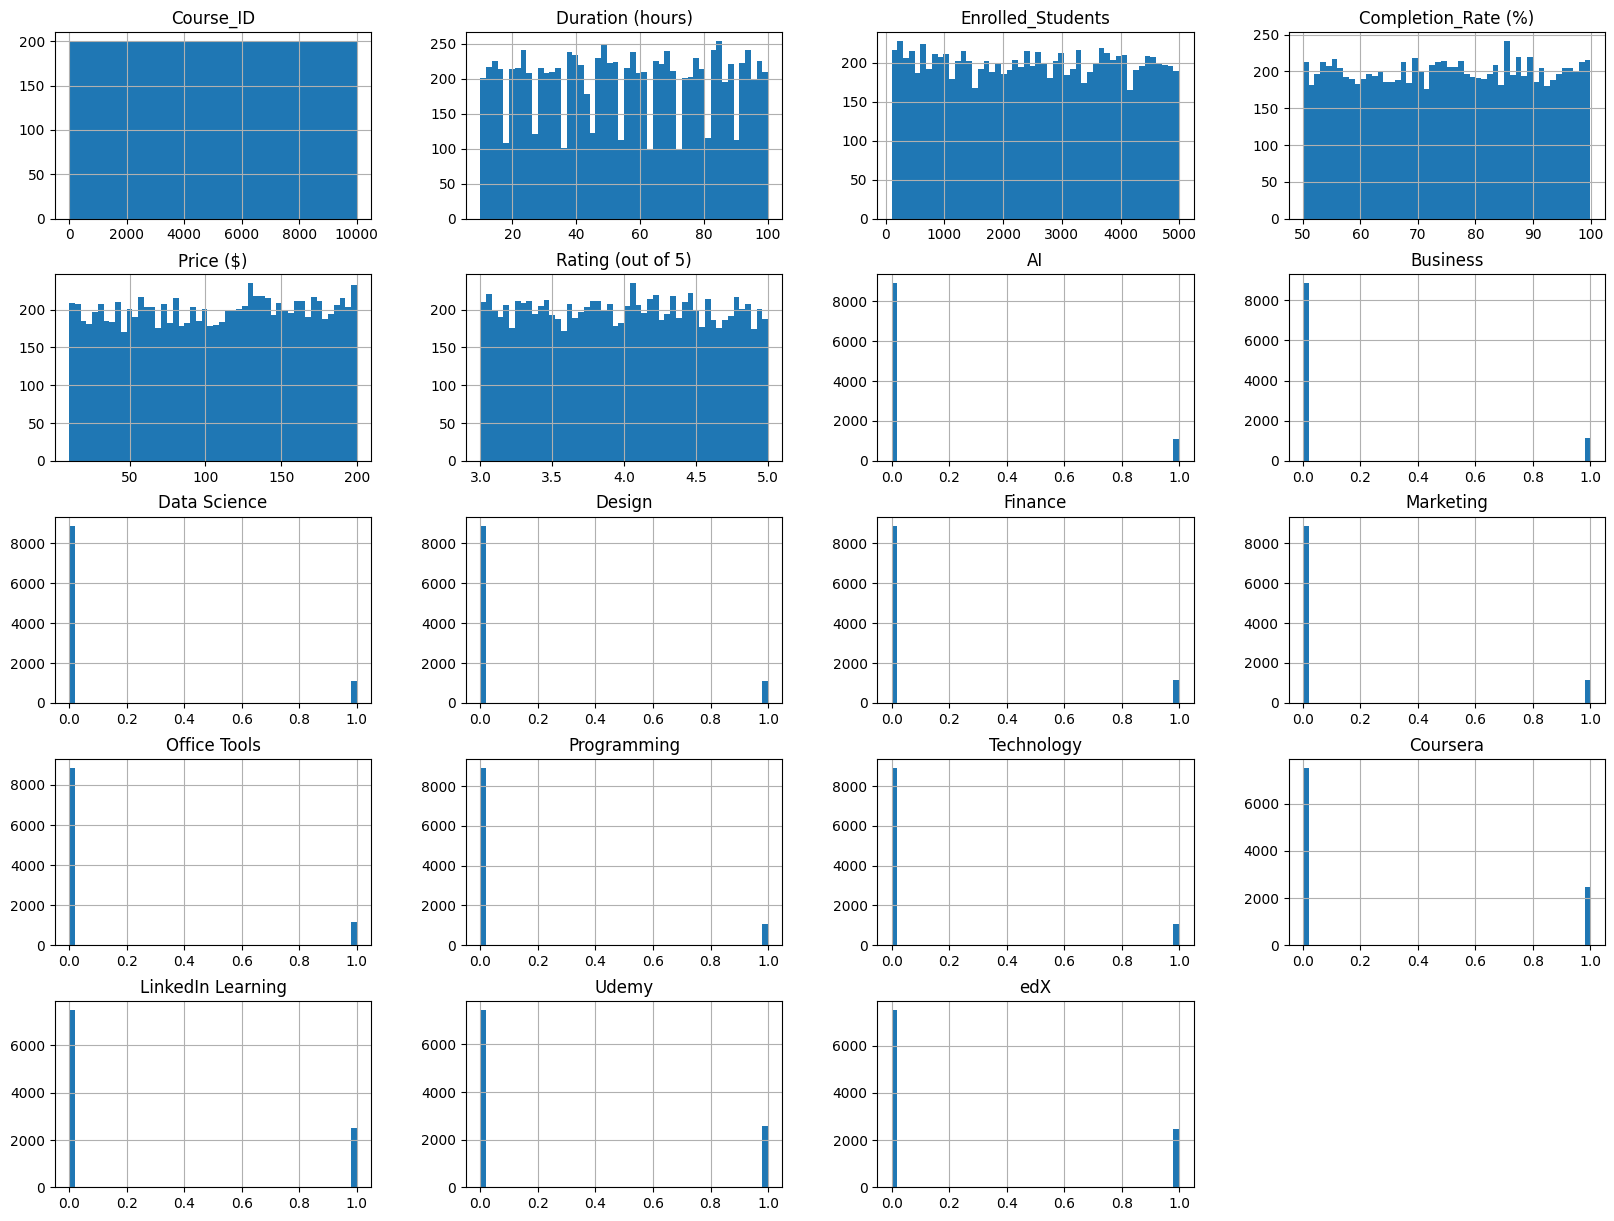

In [12]:
# Plotting histograms
import matplotlib.pyplot as plt
courses.hist(bins=50, figsize=(20, 15))

## Removing Irrelevant Features
1. Course_ID and Course_Name are irrelevant because both of them solely provide serial numbers to the entries of the data frame.
   
2. Category and Platform features are removed becuase their encoded values are already added to the dataframe.


In [13]:
courses = courses.drop(columns=["Course_ID", "Course_Name", "Platform", "Category"], axis=1)
courses.head()

,Duration (hours),Enrolled_Students,Completion_Rate (%),Price ($),Rating (out of 5),AI,Business,Data Science,Design,Finance,Marketing,Office Tools,Programming,Technology,Coursera,LinkedIn Learning,Udemy,edX
0,21,4217,50.646827,38.797425,4.811252,0,0,0,0,0,0,1,0,0,1,0,0,0
1,57,4238,82.240240,160.650991,3.829329,0,0,0,0,0,0,1,0,0,0,0,0,1
2,52,2700,55.729028,123.503781,4.851950,0,0,0,0,0,0,0,0,1,0,1,0,0
3,69,4308,58.664729,116.775704,3.913732,0,0,0,0,0,0,1,0,0,0,1,0,0
4,43,4792,62.598147,96.246696,4.921968,0,0,0,0,0,0,0,0,1,0,0,1,0


## Train-Test Splitting

In [14]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Duration (hours)     10000 non-null  int64  
 1   Enrolled_Students    10000 non-null  int64  
 2   Completion_Rate (%)  10000 non-null  float64
 3   Price ($)            10000 non-null  float64
 4   Rating (out of 5)    10000 non-null  float64
 5   AI                   10000 non-null  int64  
 6   Business             10000 non-null  int64  
 7   Data Science         10000 non-null  int64  
 8   Design               10000 non-null  int64  
 9   Finance              10000 non-null  int64  
 10  Marketing            10000 non-null  int64  
 11  Office Tools         10000 non-null  int64  
 12  Programming          10000 non-null  int64  
 13  Technology           10000 non-null  int64  
 14  Coursera             10000 non-null  int64  
 15  LinkedIn Learning    10000 non-null  

In [15]:
from sklearn.model_selection import GroupShuffleSplit

# Create a combined categorical column as before
courses['combined'] = courses[['AI', 'Business', 'Design', 'Finance', 'Marketing', 'Office Tools', 'Programming', 'Technology', 'Coursera', 'LinkedIn Learning', 'Udemy', 'edX']].astype(str).agg('_'.join, axis=1)
courses.head()
# Initialize GroupShuffleSplit
gss = GroupShuffleSplit(test_size=0.20, n_splits=1, random_state=42)

# Perform split
for train_index, test_index in gss.split(courses, groups=courses['combined']):
    X_train, X_test = courses.iloc[train_index], courses.iloc[test_index]

X_train = X_train.drop("combined", axis=1)
X_test = X_test.drop("combined", axis=1)

In [16]:
# Ensuring proportionality in the split data

# def printCounts(cat) :
#     print(X_train[cat].value_counts())
#     print(X_test[cat].value_counts())
#     print(courses[cat].value_counts())

# printCounts('Business')
# printCounts('Programming')
# printCounts('Udemy')

In [17]:
# From this point: only work on training, no data to be accessed from testing set
courses = X_train.copy()

## Understanding Correlations

In [18]:
from pandas.plotting import scatter_matrix
corr_matrix = courses.corr()
corr_matrix['Rating (out of 5)'].sort_values(ascending=False)

Rating (out of 5)      1.000000
Data Science           0.019813
Design                 0.011579
Coursera               0.009891
Udemy                  0.009205
Marketing              0.004367
Programming            0.003327
edX                    0.000445
Price ($)             -0.000303
Finance               -0.001198
Completion_Rate (%)   -0.004475
Business              -0.005087
Office Tools          -0.005877
AI                    -0.008009
Duration (hours)      -0.011732
Enrolled_Students     -0.016374
LinkedIn Learning     -0.019516
Technology            -0.021252
Name: Rating (out of 5), dtype: float64

## Trying different Attributes

In [19]:
courses["Price/hour"] = courses["Price ($)"]/courses["Duration (hours)"]
courses.head()

,Duration (hours),Enrolled_Students,Completion_Rate (%),Price ($),Rating (out of 5),AI,Business,Data Science,Design,Finance,Marketing,Office Tools,Programming,Technology,Coursera,LinkedIn Learning,Udemy,edX,Price/hour
0,21,4217,50.646827,38.797425,4.811252,0,0,0,0,0,0,1,0,0,1,0,0,0,1.847496
2,52,2700,55.729028,123.503781,4.851950,0,0,0,0,0,0,0,0,1,0,1,0,0,2.375073
3,69,4308,58.664729,116.775704,3.913732,0,0,0,0,0,0,1,0,0,0,1,0,0,1.692402
4,43,4792,62.598147,96.246696,4.921968,0,0,0,0,0,0,0,0,1,0,0,1,0,2.238295
5,66,3792,96.671900,127.509920,3.252283,0,0,0,0,1,0,0,0,0,0,0,0,1,1.931968


In [20]:
corr_matrix = courses.corr()
corr_matrix["Rating (out of 5)"].sort_values(ascending=False)

Rating (out of 5)      1.000000
Data Science           0.019813
Design                 0.011579
Price/hour             0.010206
Coursera               0.009891
Udemy                  0.009205
Marketing              0.004367
Programming            0.003327
edX                    0.000445
Price ($)             -0.000303
Finance               -0.001198
Completion_Rate (%)   -0.004475
Business              -0.005087
Office Tools          -0.005877
AI                    -0.008009
Duration (hours)      -0.011732
Enrolled_Students     -0.016374
LinkedIn Learning     -0.019516
Technology            -0.021252
Name: Rating (out of 5), dtype: float64

<Axes: xlabel='Price/hour', ylabel='Rating (out of 5)'>

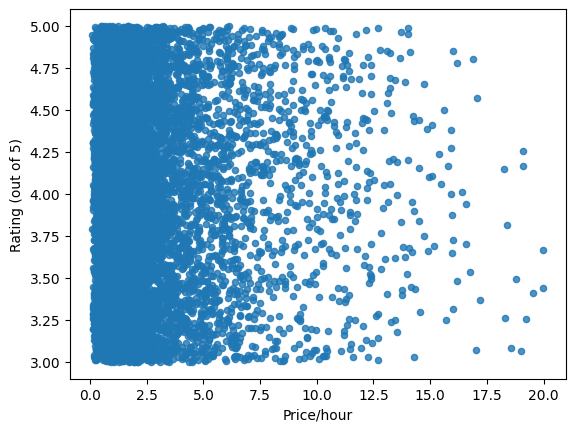

In [21]:
courses.plot(kind="scatter", x="Price/hour", y="Rating (out of 5)", alpha=0.8)

Since this feature doesn't show too strong of a correlation, we will disregard it.

In [22]:
courses = courses.drop("Price/hour", axis=1)

## Separating Features and Labels

In [23]:
courses_labels = courses["Rating (out of 5)"].copy() #labels
courses = courses.drop("Rating (out of 5)", axis=1) #features

## Fitting Imputer

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median") #median to ensure categorical values remain 0 or 1
imputer.fit(courses)

imputer.statistics_

array([  55.        , 2543.        ,   75.61472191,  107.771199  ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ])

In [25]:
X = imputer.transform(courses)
courses_new = pd.DataFrame(X, columns=courses.columns)
courses_new.describe()

,Duration (hours),Enrolled_Students,Completion_Rate (%),Price ($),AI,Business,Data Science,Design,Finance,Marketing,Office Tools,Programming,Technology,Coursera,LinkedIn Learning,Udemy,edX
count,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000
mean,55.103015,2536.218602,75.405613,106.347622,0.107761,0.071713,0.140860,0.111097,0.107505,0.109686,0.075690,0.138037,0.137652,0.245542,0.250674,0.254394,0.249391
std,26.235086,1426.474866,14.450458,55.168731,0.310099,0.258028,0.347899,0.314272,0.309774,0.312518,0.264518,0.344961,0.344557,0.430436,0.433429,0.435548,0.432688
min,10.000000,101.000000,50.008183,10.037342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1290.500000,62.979158,58.363537,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,2543.000000,75.614722,107.771199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,78.000000,3773.500000,87.883843,153.933157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,100.000000,5000.000000,99.994300,199.962412,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Creating Pipeline

Demosntrating a few operations using a pipeline. To showcase understanding of pipelines

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Define the numerical features
numerical_features = ["Duration (hours)", "Enrolled_Students", "Completion_Rate (%)", "Price ($)"]

# Define a ColumnTransformer to handle different transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy="median")),
            ('std_scaler', StandardScaler())
        ]), numerical_features),
        ('all', SimpleImputer(strategy="median"), ~courses.columns.isin(numerical_features))
    ],
    remainder='passthrough'
)

# Create the final pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Example of fitting and transforming the data
# courses_tr = pipeline.fit_transform(courses)


In [27]:
courses_tr = pipeline.fit_transform(courses) #Applying only on features
courses_tr.shape
print(courses_tr[:5])

[[-1.2999844   1.1783518  -1.71346644 -1.2245076   0.          0.
   0.          0.          0.          0.          1.          0.
   0.          1.          0.          0.          0.        ]
 [-0.11828487  0.11482285 -1.36174558  0.31099608  0.          0.
   0.          0.          0.          0.          0.          0.
   1.          0.          1.          0.          0.        ]
 [ 0.5297439   1.24214951 -1.15857629  0.18903372  0.          0.
   0.          0.          0.          0.          1.          0.
   0.          0.          1.          0.          0.        ]
 [-0.46135893  1.58146923 -0.88635859 -0.18310326  0.          0.
   0.          0.          0.          0.          0.          0.
   1.          0.          0.          1.          0.        ]
 [ 0.41538588  0.88039543  1.47176313  0.38361686  0.          0.
   0.          0.          1.          0.          0.          0.
   0.          0.          0.          0.          1.        ]]


## Selecting a Model

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# model = LinearRegression() - high rmse
# model = DecisionTreeRegressor() - overfittng
model = RandomForestRegressor() #Chosen model
# model = GradientBoostingRegressor(n_estimators=100, learning_rate=1, max_depth=3, random_state=42) - high rmse

model.fit(courses_tr, courses_labels)

RandomForestRegressor()

In [75]:
some_data = courses.iloc[:5]
some_labels = courses_labels.iloc[:5]

In [76]:
data = pipeline.transform(some_data)
model.predict(data)

array([4.51468646, 4.51634532, 3.9400337 , 4.60113235, 3.54022357])

In [77]:
list(some_labels)

[4.811251609761661,
 4.851950080367606,
 3.913731844246669,
 4.921968098570236,
 3.2522834617959484]

## Evaluating the Model

In [78]:
from sklearn.metrics import mean_squared_error
import numpy as np
courses_predictions = model.predict(courses_tr)
mse = mean_squared_error(courses_labels, courses_predictions)
rmse = np.sqrt(mse)

In [79]:
rmse

np.float64(0.22002541197947742)

# Cross Validaion Evaluation

In [80]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, courses_tr, courses_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [81]:
rmse_scores

array([0.60678487, 0.58591862, 0.59452931, 0.58645164, 0.60546828,
       0.58386882, 0.57306259, 0.58901358, 0.5686127 , 0.60474019])

## Saving the Model

In [36]:
from joblib import dump, load
dump(model, 'Rating.joblib')

['Rating.joblib']

## Testing the model on test data

In [83]:
x_test = X_test.drop("Rating (out of 5)", axis=1)
y_test = X_test["Rating (out of 5)"].copy()
x_test_prepared = pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(final_rmse)
print(final_predictions[20:25], list(y_test[20:25])) #random sample to check

0.5961845905205643
[3.85472567 4.03414358 3.97990972 4.04779418 4.07542734] [4.851885653674137, 3.12877527232356, 3.479145049932587, 4.578316113063259, 4.241782535818151]
